# Grouped Bar Plot
> Grouped bar plots

In [ ]:
#hide
import altair as alt
import pandas as pd
import plotnine

from gapminder import gapminder
from plotnine.data import mtcars
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
from bbplot.bbplot import bbc_style

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
alt.renderers.enable('html')

from bbplot.custom_theme import bbc_theme # Custom top-level configuration for charts
alt.themes.register("my_custom_theme", bbc_theme)
alt.themes.enable("my_custom_theme")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ThemeRegistry.enable('my_custom_theme')

In [ ]:
# Prepare data
grouped_bar_df = (
    gapminder[[
        'country', 'year', 'lifeExp'
    ]].query(' year == 1967 | year == 2007 ')
    .pivot_table(
        index=['country'], columns='year',
        values='lifeExp')
    .assign(gap=lambda x: x[2007] - x[1967])
    .nlargest(5, 'gap')
    .reset_index()
    .melt(value_vars=[1967, 2007],
          id_vars=['country', 'gap'],
      value_name='lifeExp')
)

grouped_bar_df

,country,gap,year,lifeExp
0,Oman,28.652,1967,46.988
1,Vietnam,26.411,1967,47.838
2,"Yemen, Rep.",25.714,1967,36.984
3,Indonesia,24.686,1967,45.964
4,Libya,23.725,1967,50.227
5,Oman,28.652,2007,75.640
6,Vietnam,26.411,2007,74.249
7,"Yemen, Rep.",25.714,2007,62.698
8,Indonesia,24.686,2007,70.650
9,Libya,23.725,2007,73.952


# Original plot
![image.png](images/groupedbar_plot.png)

# Python

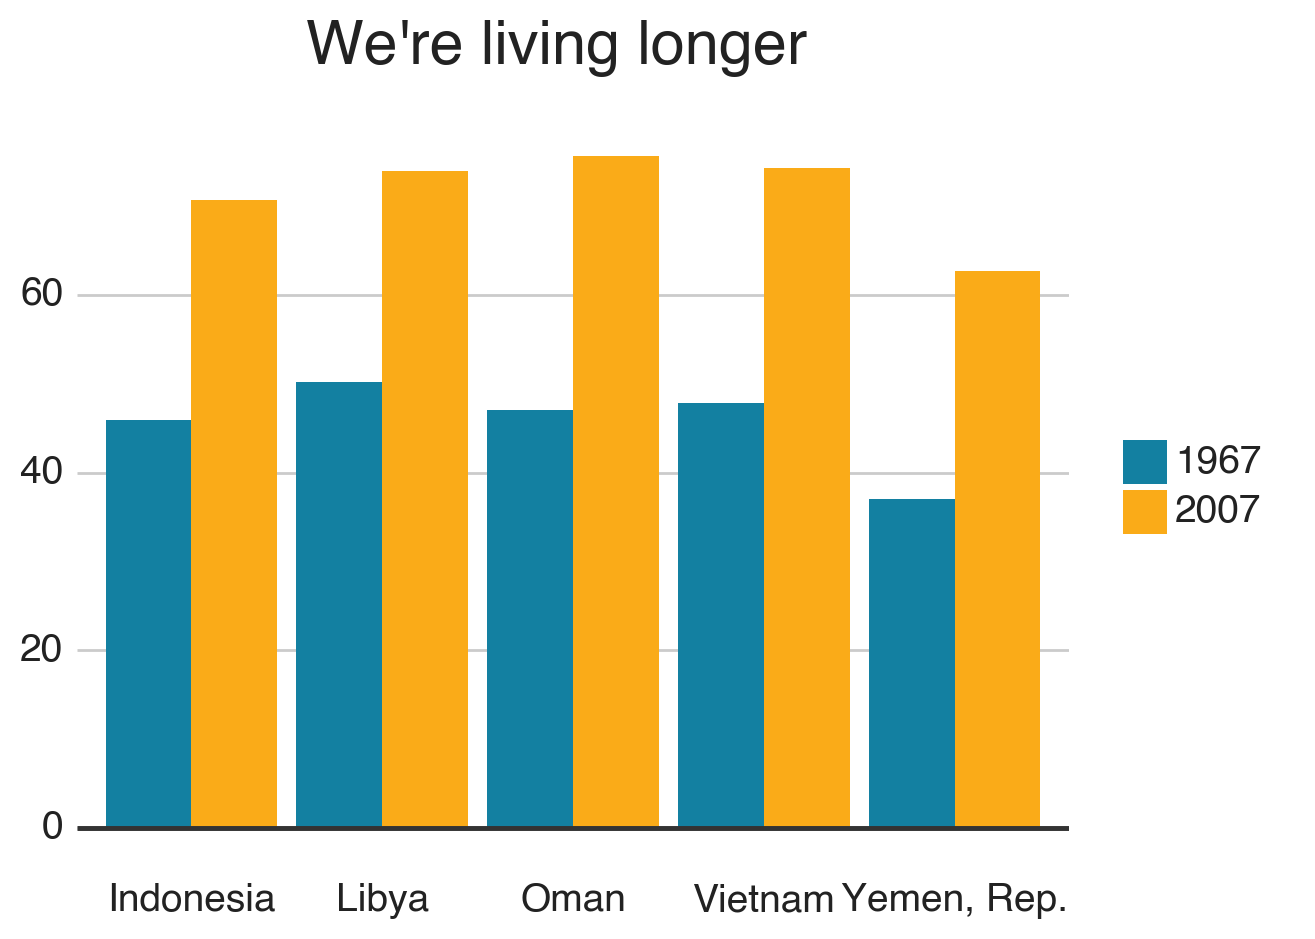

<ggplot: (-9223371848240241332)>

In [ ]:
# plotnine
grouped_bars_ggplot = (ggplot(grouped_bar_df,
                       aes(x='country',
                           y='lifeExp',
                           fill='year')) +
                geom_bar(stat="identity", position="dodge") +
                geom_hline(yintercept=0, size=1, colour="#333333") +
                bbc_style() +
                scale_fill_manual(values=("#1380A1", "#FAAB18")) +
#                         ggtitle('123')+\
                labs(title="We're living longer",
                     subtitle="Biggest life expectancy rise, 1967-2007"))

grouped_bars_ggplot

In [ ]:
# altair
grouped_bars_altair = (
    alt.Chart(grouped_bar_df)
    .mark_bar(size=42)
    .encode(x='year:N',
            y='lifeExp:Q',
            color=alt.Color('year:N', scale=alt.Scale(
                range=["#1380A1", "#FAAB18"])),
            column='country:N')
    .properties(title={'text': "We're living longer",
                       'subtitle': 'Biggest life expectancy rise, 1967-2007'},
                width=100
                ).configure_facet(
        spacing=0.5,
#         strokeWidth=1.0,
    ).configure_scale(
        bandPaddingInner=0.4,
        bandPaddingOuter=0.4
    ).configure_header(labelOrient='bottom',
                       labelPadding=6,
                       titleOrient='bottom')
    .configure_axisX(
        ticks=False,
        labels=False,
        title=None,
    ).configure_view(
        stroke=None
    )
)

grouped_bars_altair

alt.Chart(...)